# 噪声

## 基础包导入和函数和变量声明

In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage import util
import numpy as np
import random

lenna_path = '../resource/image/lenna.png'
lenna_color = cv2.imread('../resource/image/lenna.png', 1)
lenna_gray = cv2.cvtColor(lenna_color, cv2.COLOR_BGR2GRAY)


def paint_with_matplotlib(original_img, noised):
    plt.subplot(121)
    plt.imshow(original_img, cmap='gray')
    plt.subplot(122)
    plt.imshow(noised, cmap='gray')
    plt.show()


def paint_with_cv(original_img, noised):
    cv2.imshow('Color Image Compare Before & After Histogram Equalization', np.hstack([original_img, noised]))
    cv2.waitKey(0)

## 高斯噪声

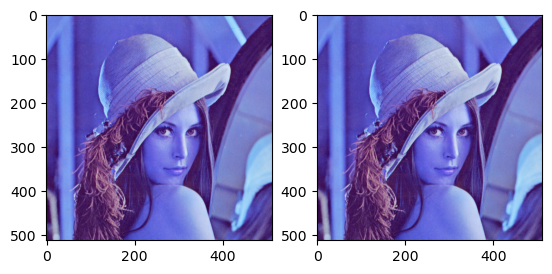

In [5]:
def gaussian_noise(src, means, sigma, percentage):
    noise_img = src
    height = src.shape[0]
    weight = src.shape[1]
    noise_num = int(percentage * height * weight)
    for i in range(noise_num):
        random_x = random.randint(0, height - 1)  #高斯噪声图片边缘不处理，故-1
        random_y = random.randint(0, weight - 1)  #高斯噪声图片边缘不处理，故-1
        for channel in range(noise_img.shape[2]):
            #此处在原有像素灰度值上加上随机数
            gauss = random.gauss(means, sigma)
            noised_value = noise_img[random_x, random_y, channel] + gauss
            #若灰度值小于0则强制为0，若灰度值大于255则强制为255
            noised_value = np.clip(noised_value, 0, 255)
            noise_img[random_x, random_y, channel] = noised_value
    paint_with_matplotlib(src, noise_img)


gaussian_noise(lenna_color, 2, 0.1, 0.1)

## 椒盐噪声

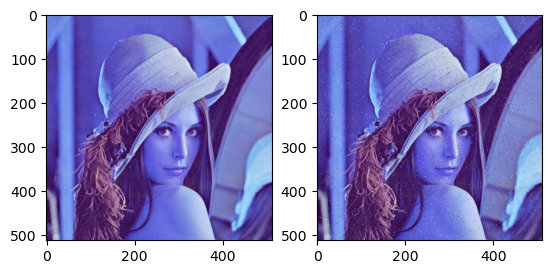

In [5]:
def pepper_salt_noise(original_img, percentage):
    """
    椒盐噪声
    :param original_img: 原始图片
    :param percentage: 噪声比例
    """
    noised = original_img.copy()
    height = original_img.shape[0]
    weight = original_img.shape[1]
    noise_num = int(percentage * height * weight)

    for i in range(noise_num):
        rand_x = random.randint(0, height - 1)
        rand_y = random.randint(0, weight - 1)
        # 随机加椒或盐
        if random.random() <= 0.5:
            noised[rand_x, rand_y] = 0
        else:
            noised[rand_x, rand_y] = 255

    paint_with_matplotlib(original_img, noised)


pepper_salt_noise(lenna_color, 0.01)

## 柏松噪声



##

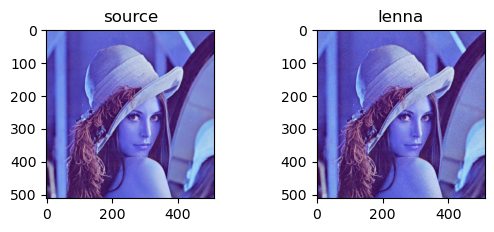

In [6]:
img = lenna_color

noise_gs_img = util.random_noise(img, mode='poisson')

plt.figure
plt.subplot(221)
plt.imshow(img), plt.title("source")

plt.subplot(222)
plt.imshow(noise_gs_img), plt.title("lenna")
plt.show()

## 均匀噪声

> 均值mean
>
> 方差variance
>
> out=image+n*image

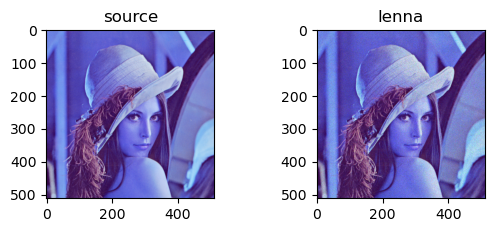

In [7]:
img = lenna_color

noise_gs_img = util.random_noise(img, mode='speckle')

plt.figure
plt.subplot(221)
plt.imshow(img), plt.title("source")

plt.subplot(222)
plt.imshow(noise_gs_img), plt.title("lenna")
plt.show()